# Lab: Comparing regression models
_Week 4 - Day 2_

## Context
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

**Some business Objectives:**
- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

# Cleaning numerical data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
customer_df = pd.read_csv('files_for_lab/customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
display(customer_df.shape)
display(customer_df.dtypes)

(9134, 24)

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

## Stantardize columns and clean data

### Columns

In [4]:
def standardize_columns(df):
    '''
This functions replaces the names of the columns by the lower case version,
blank spaces for underscores '_' and drops the column "Unnamed: 0" with index values
input: data frame
    '''
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df # If there is "unnamed: 0" column use (before: return df.drop(['unnamed:_0'], axis=1))
def clean_columns (df):
    df = standardize_columns(df)
    df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors='coerce')
    #df['effective_month'] = df['effective_to_date'].dt.month
    return df

In [ ]:
import re
def standardize_columns(df):
    cols = []
    for col in list(df.columns):
        col = re.sub('([a-z])([A-Z])', r'\1_\2', col)
        col = col.lower().replace(' ', '_')
    df.columns = cols
    return df

In [5]:
customer_df = clean_columns(customer_df)

In [6]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Missing values

In [7]:
customer_df.isnull().sum()/len(customer_df) # proportion of missing values per column in the dataframe

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

## Split variables: numerical&categorical
- Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.

In [8]:
def var_types_split (df):
    numerical = df.select_dtypes(np.number)
    categorical = df.select_dtypes('object')
    return numerical, categorical

numerical_df, categorical_df = var_types_split(customer_df)

In [9]:
display(numerical_df.head())
display(categorical_df.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


Remove ID columns

In [10]:
categorical_df.drop('customer', axis=1, inplace=True)
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


## Numerical columns

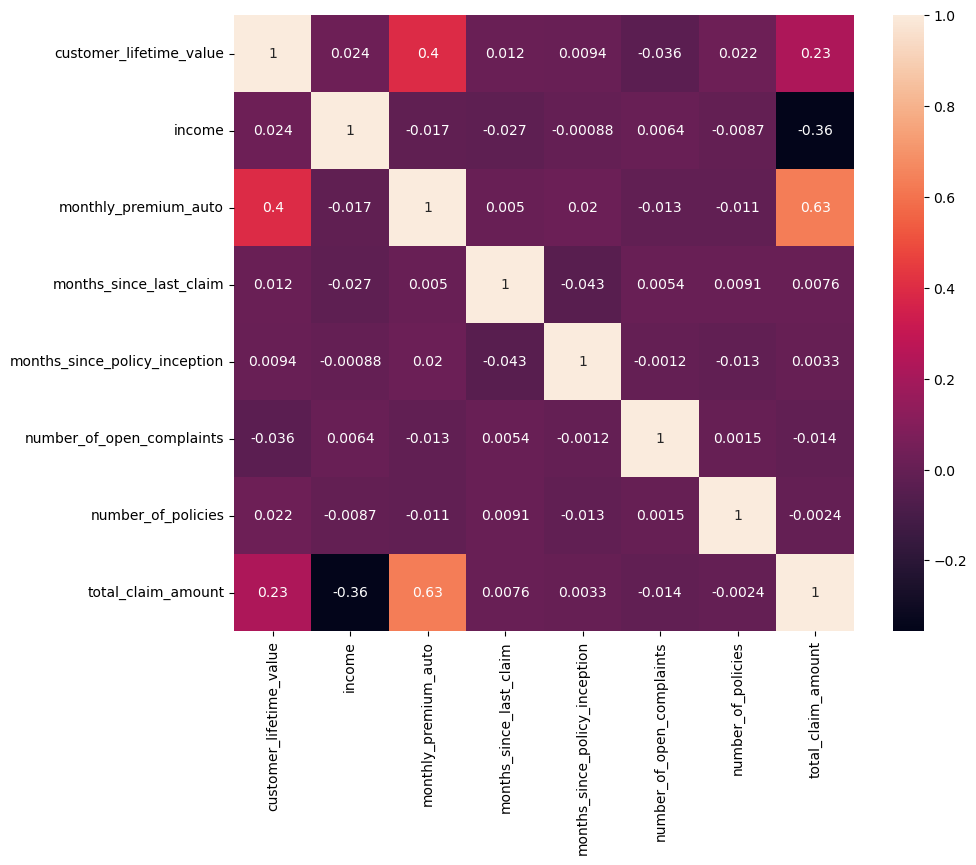

In [11]:
corr_matrix=numerical_df.corr() # default: Pearson
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

### Divide numerical variables: continuous - discrete

In [12]:
def numerical_split(df, cat=36):
    num_continuous_df = pd.DataFrame()
    num_discrete_df = pd.DataFrame()

    for col in df.columns:
        if df[col].nunique() > cat:
            num_continuous_df[col] = df[col]

        else:
            num_discrete_df[col] = df[col]

    return num_continuous_df, num_discrete_df

continuous_df, discrete_df = numerical_split(numerical_df)

In [13]:
discrete_df.head()

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


In [14]:
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


## Plots

### Discrete


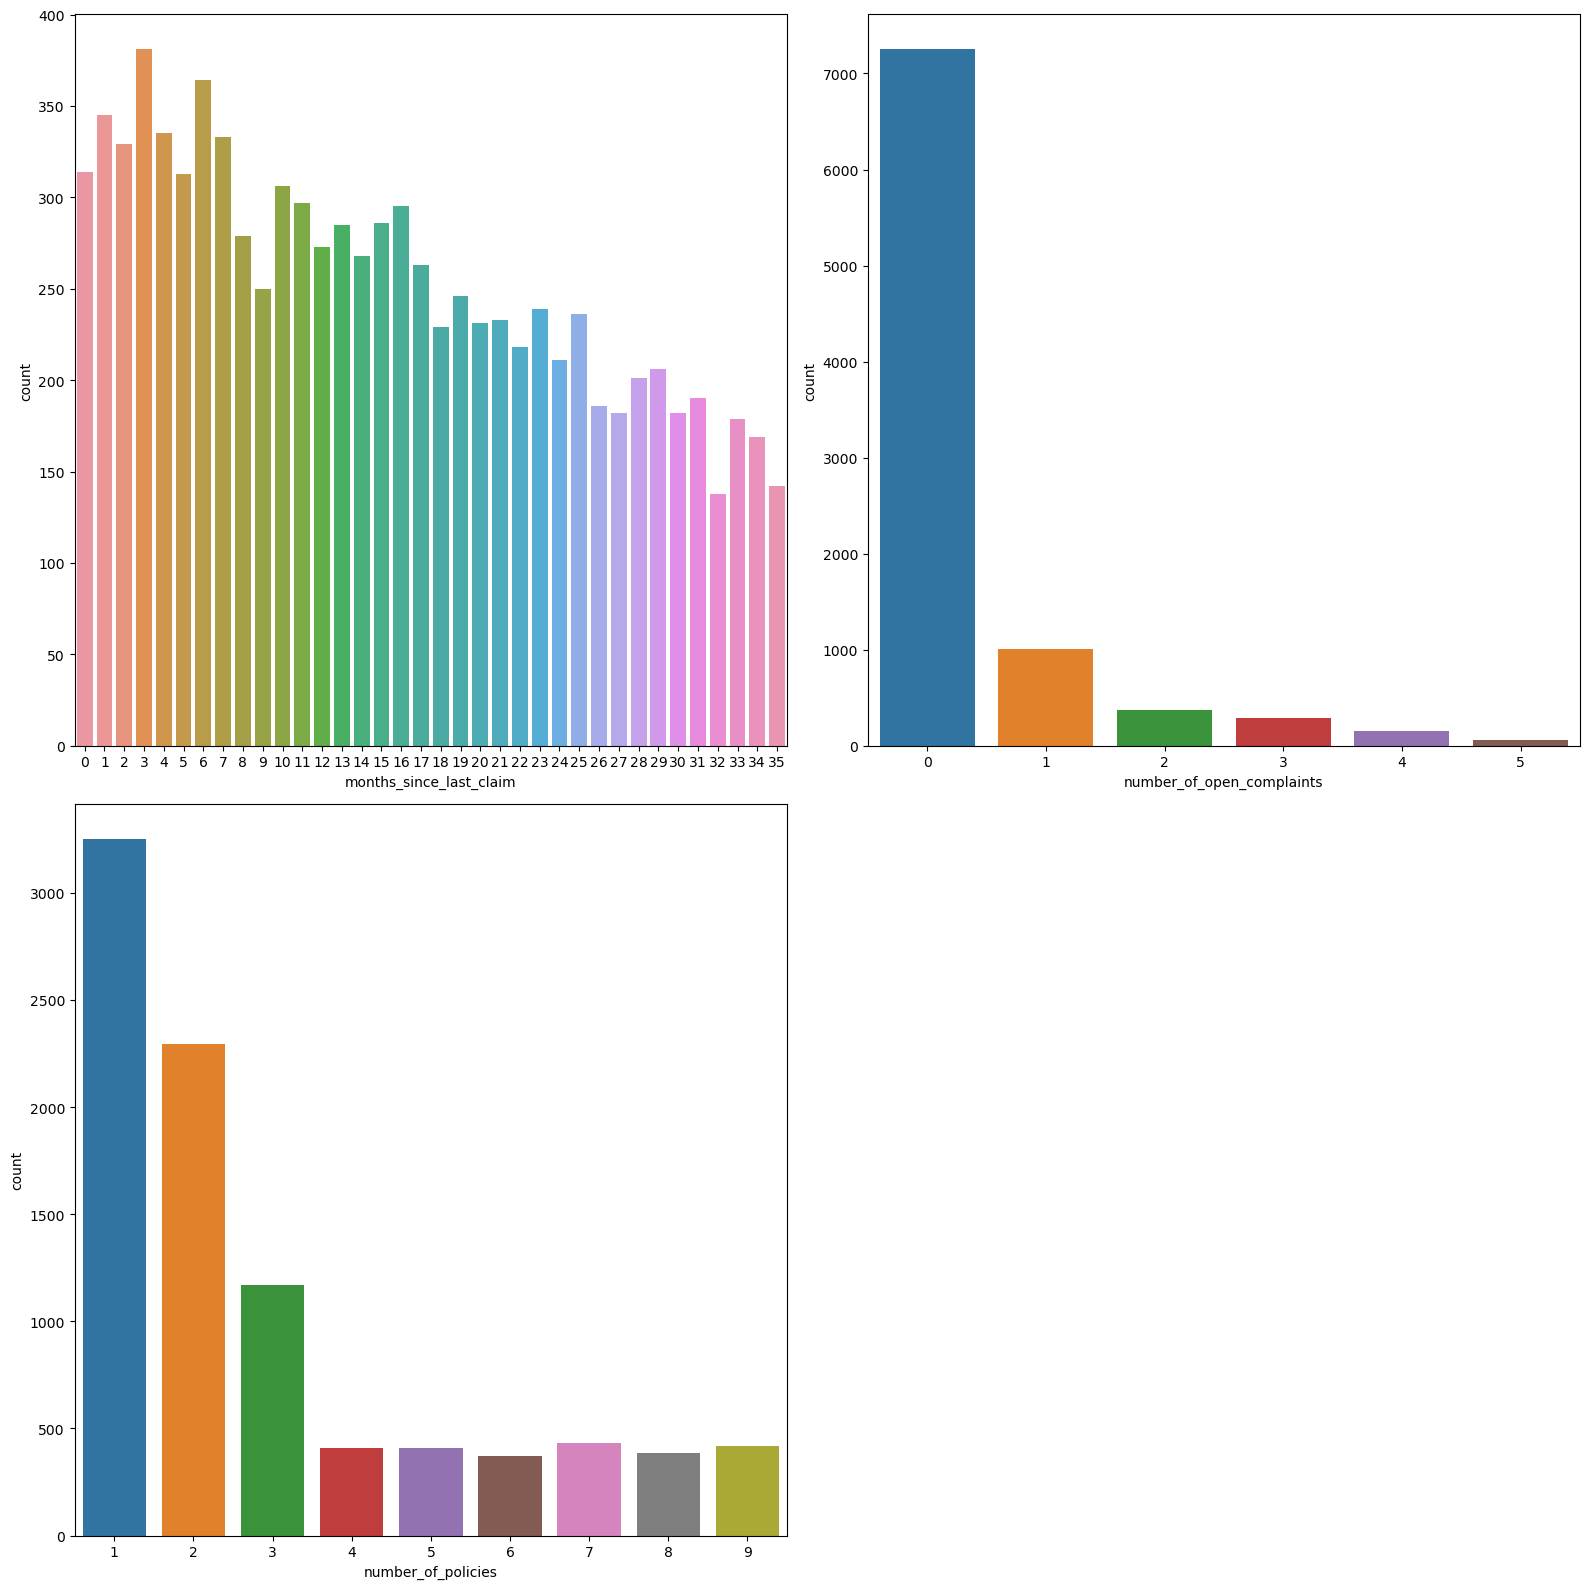

In [15]:
def plot_discrete(df):
    plt.figure(figsize=(16, 16))
    num_plots = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot((num_plots+1)//2, 2, i+1)
        sns.countplot(x=col, data=df)
    plt.tight_layout()
    plt.show()
plot_discrete(discrete_df)

### Continuous


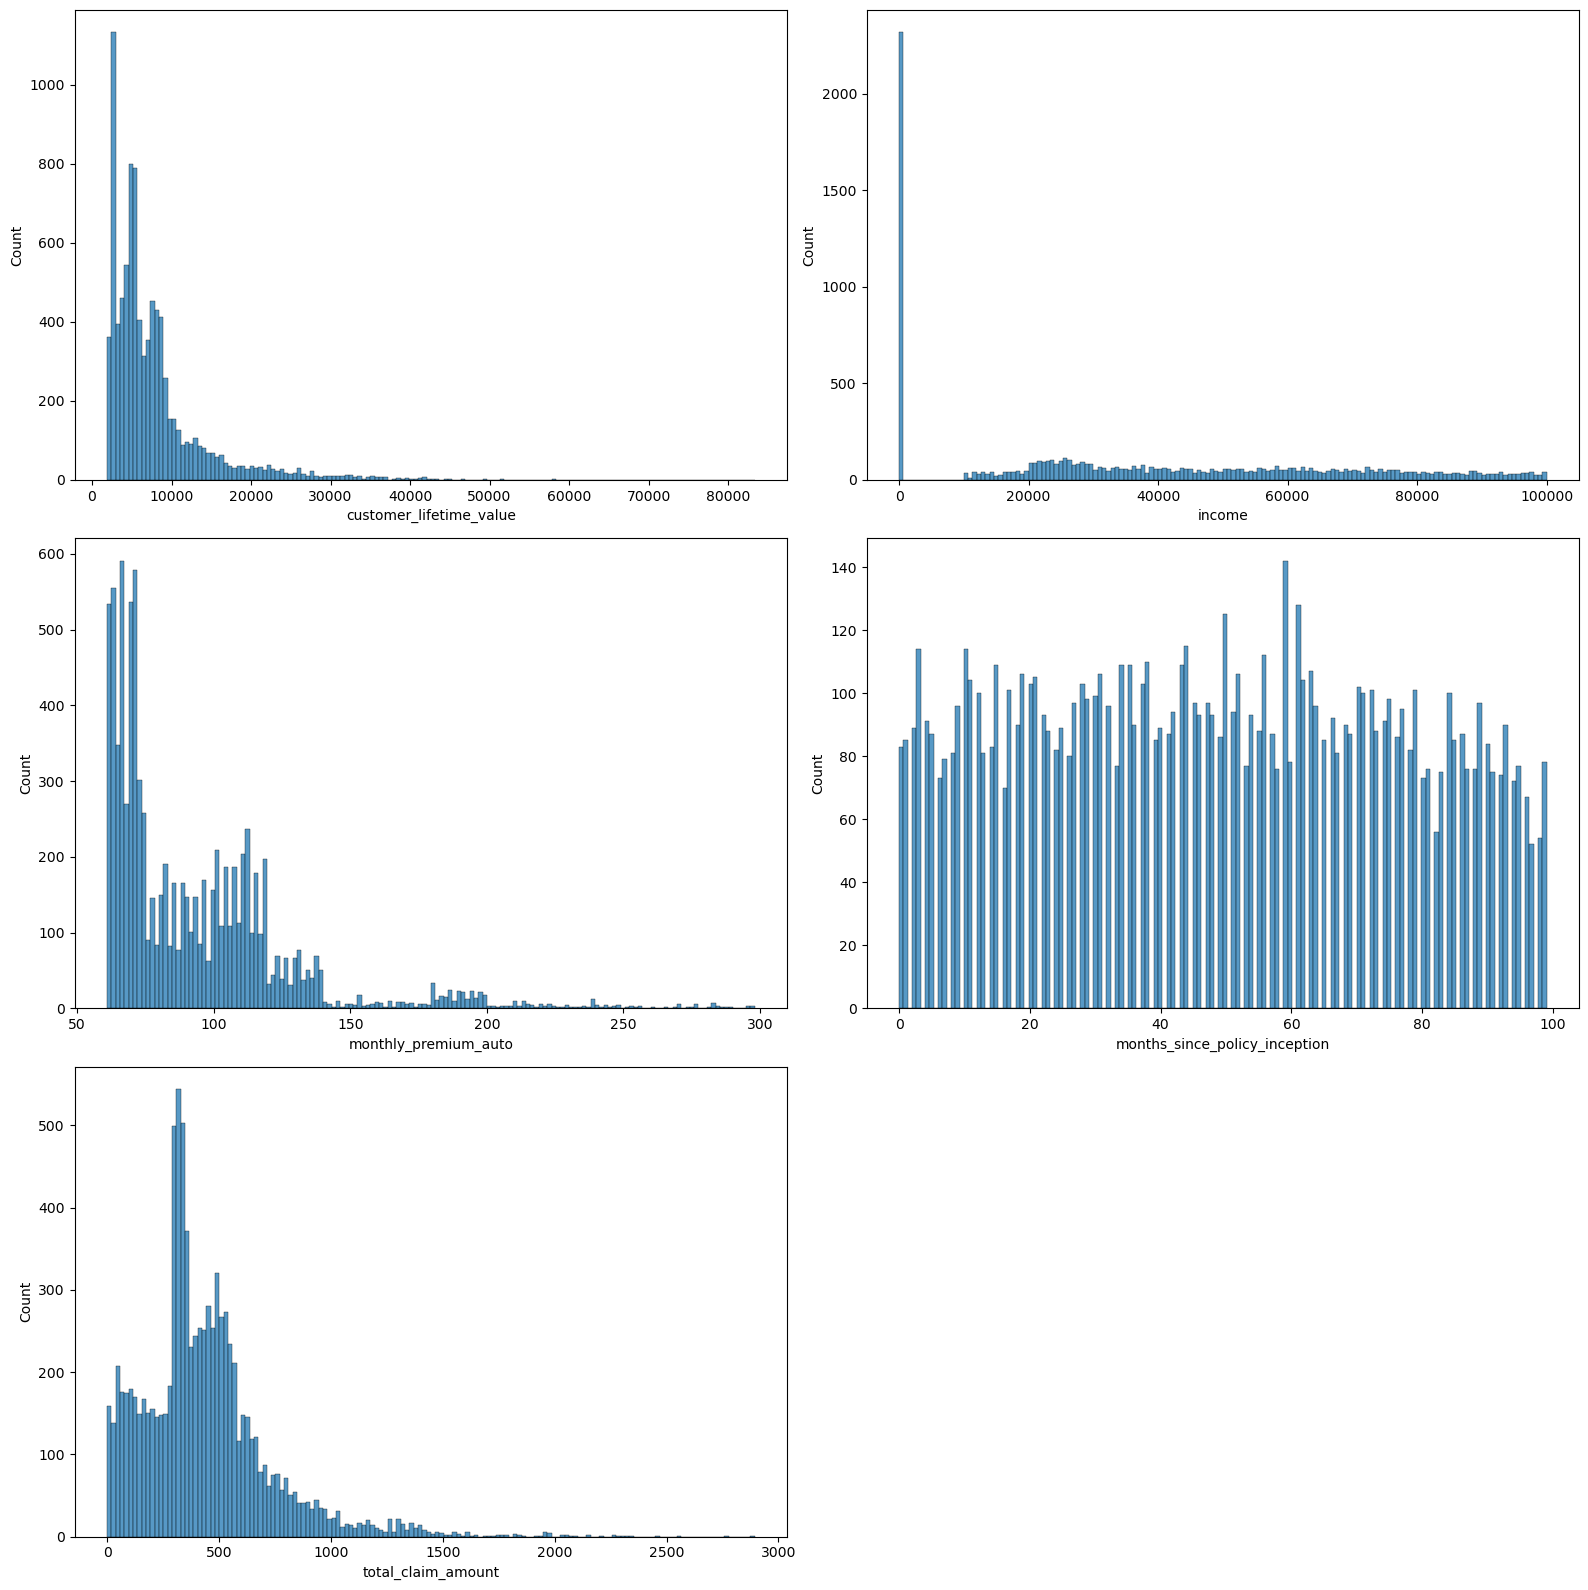

In [16]:
def plot_continuous(df):
    plt.figure(figsize=(16, 16))
    num_plots = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot((num_plots+1)//2, 2, i+1)
        sns.histplot(x=col, data=df, bins=150)
    plt.tight_layout()
    plt.show()

plot_continuous(continuous_df)

## Outliers

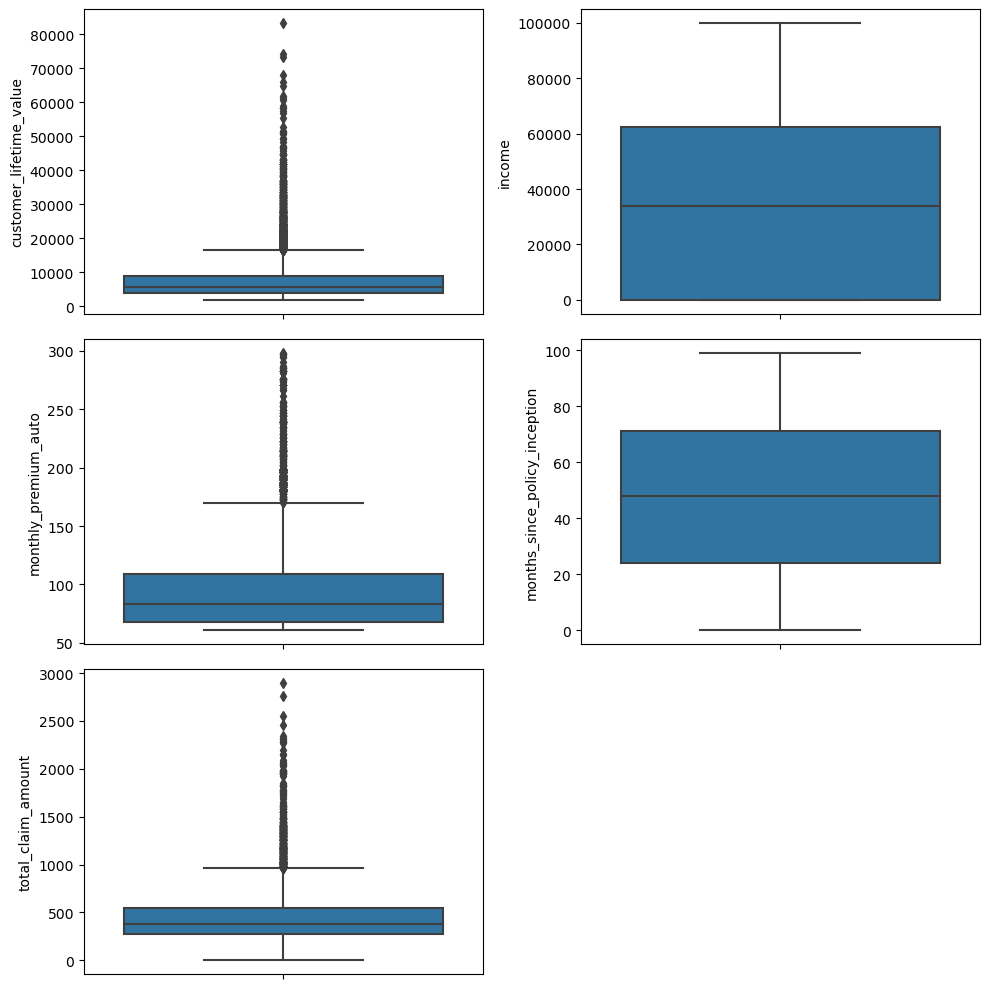

In [18]:
def boxplot_continuous(df):
    plt.figure(figsize=(10, 10)) # changed size (previosly: (16,16))
    num_plots = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot((num_plots+1)//2, 2, i+1)
        sns.boxplot(y=col, data=df)
    plt.tight_layout()
    plt.show()

boxplot_continuous(continuous_df)    

# Cleaning categorical data
Previous lab

## Plot

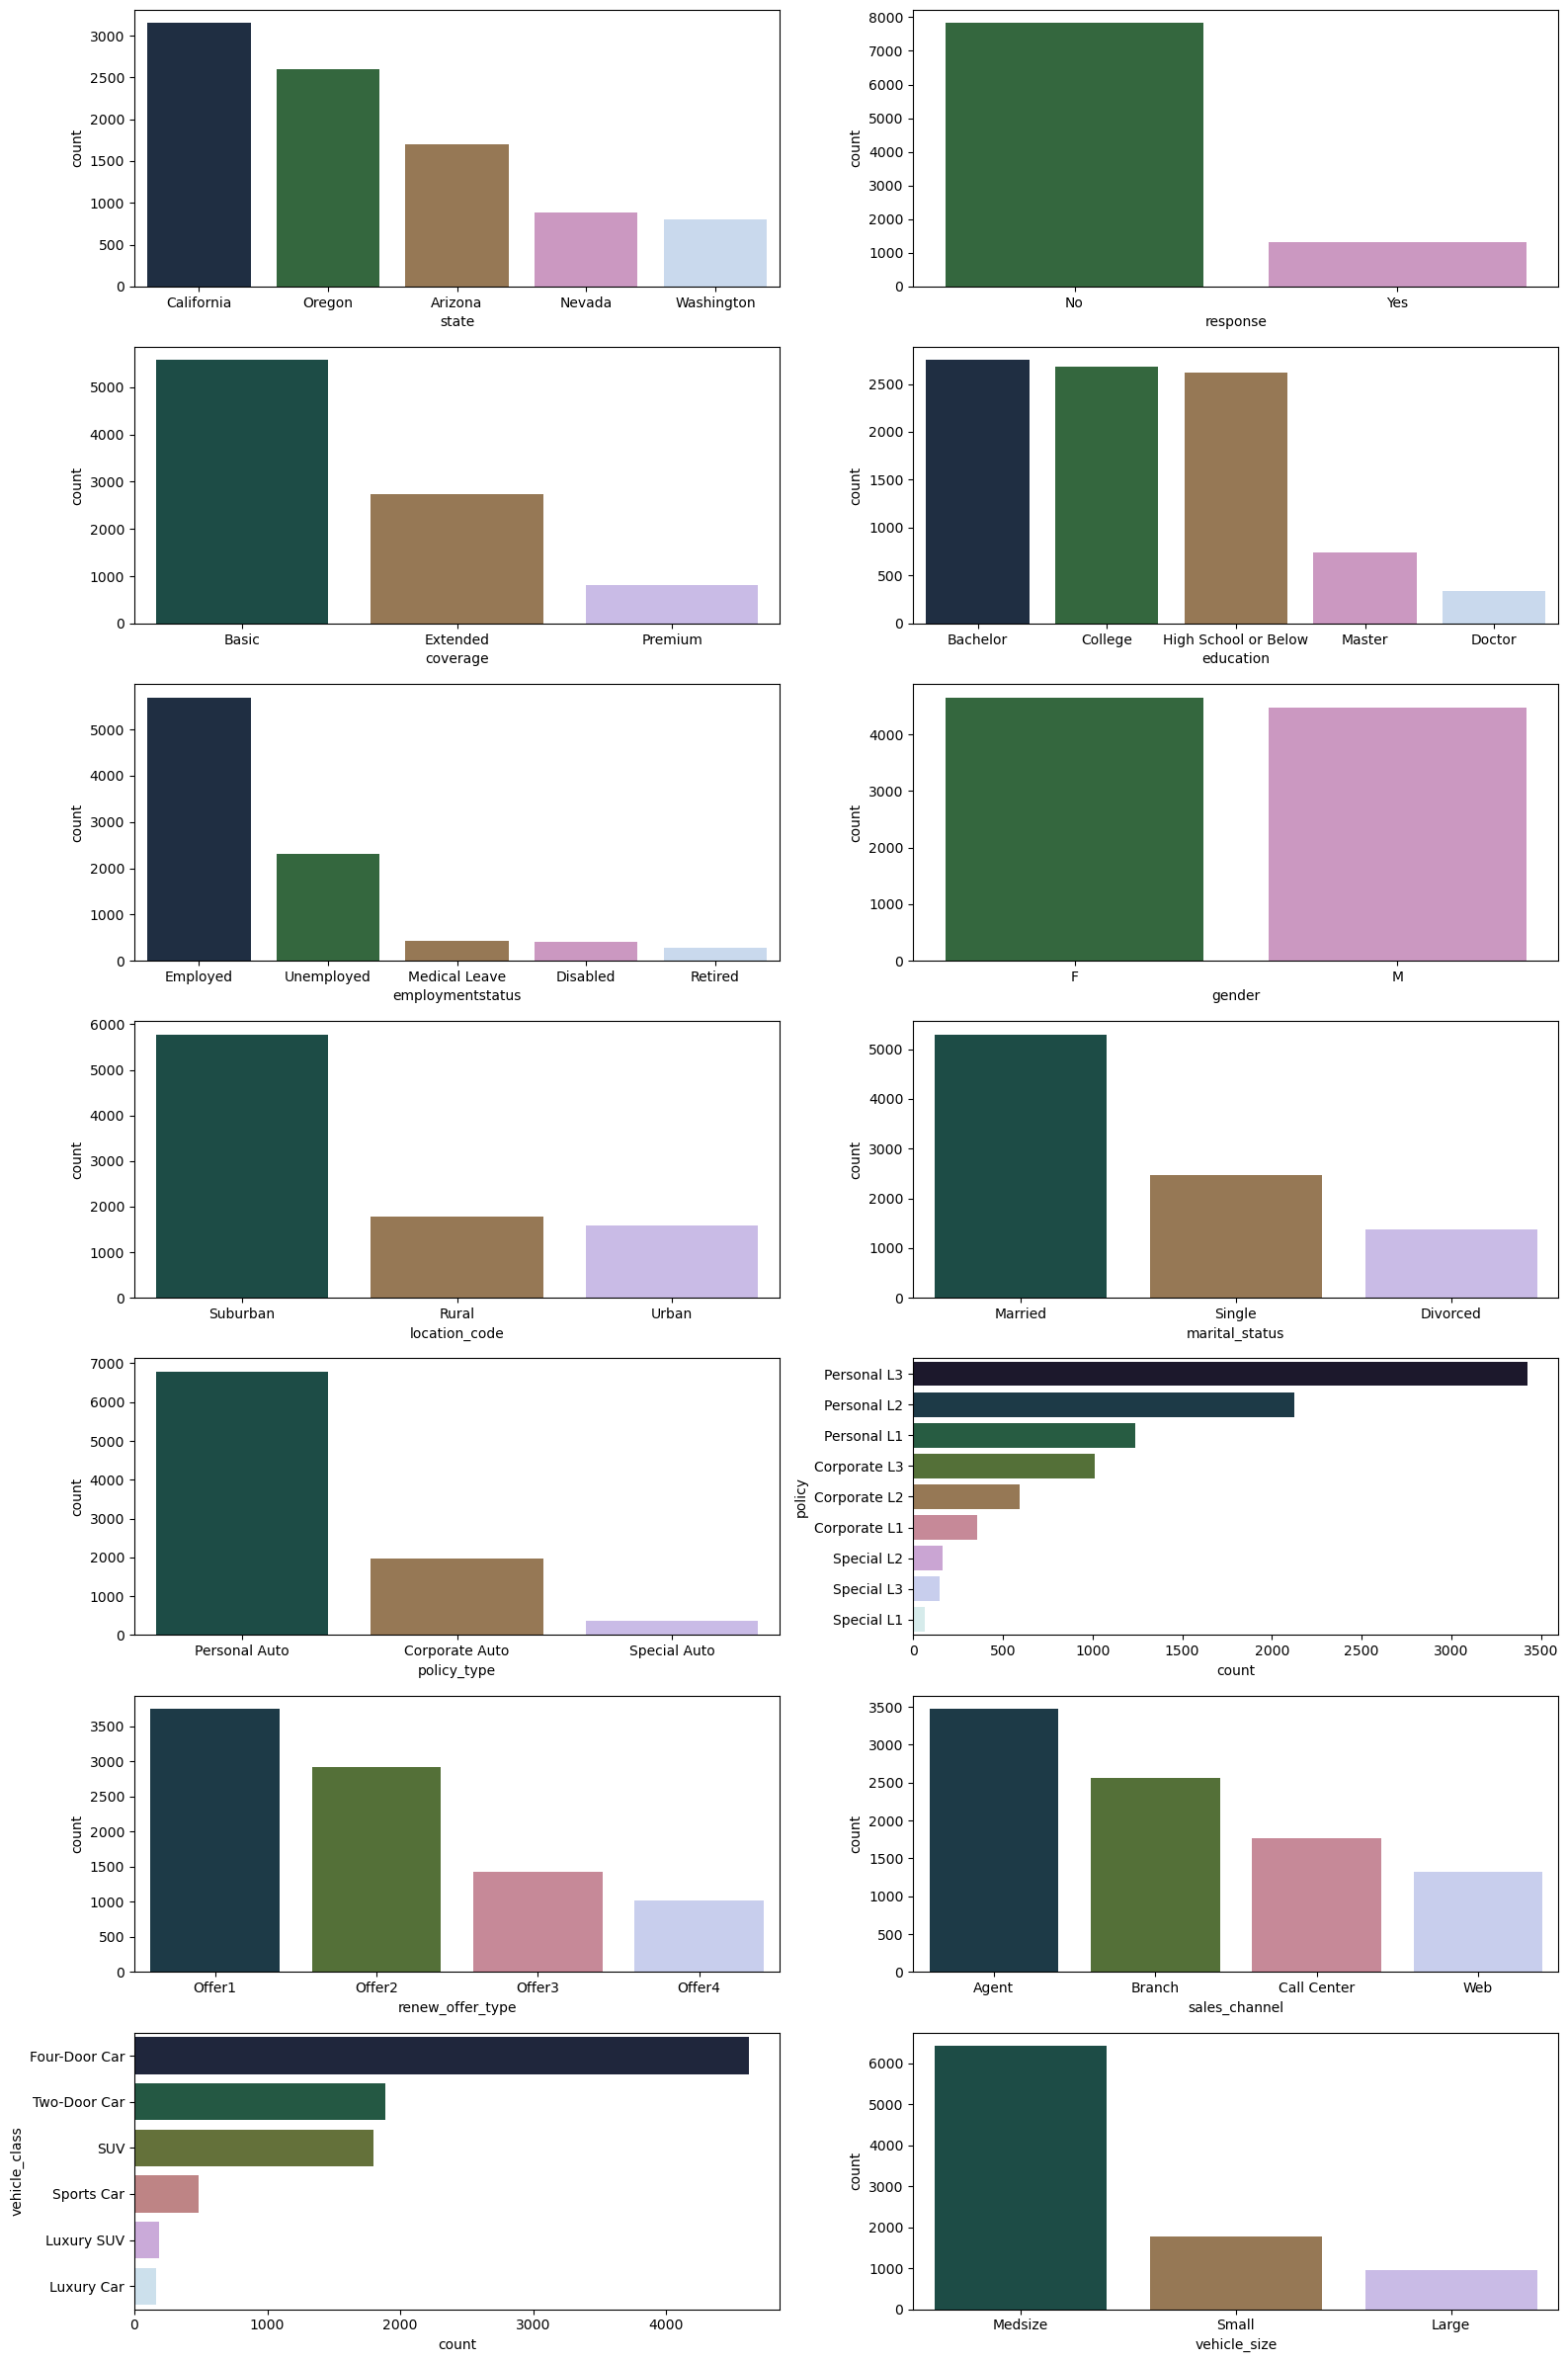

In [19]:
def plot_categorical(df, cat=6):
    plt.figure(figsize=(16, 24))
    num_plots = len(df.columns)
    for i, col in enumerate(df.columns):
        plt.subplot((num_plots+1)//2, 2, i+1)
        if df[col].nunique() < cat:
            sns.countplot(x=col, data=df, order=list(df[col].value_counts().index), palette="cubehelix")
        else:
            sns.countplot(y=col, data=df, order=list(df[col].value_counts().index), palette="cubehelix")   
    plt.tight_layout()
    plt.show()

plot_categorical(categorical_df)

## Clean categorical variables
### Policy

In [20]:
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [21]:
# check the unique categories in the variable
categorical_df['policy'].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [22]:
categorical_df.drop('policy_type', axis=1, inplace=True) # drop policy type - info duplicated
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [23]:
def regroup_policy(col):
    '''
    Input: dataframe
    Groups the data into policy categories
    '''
    if col in ['Corporate L3', 'Personal L3', 'Special L3']:
        return 'L3'
    elif col in ['Corporate L2', 'Personal L2', 'Special L2']:
        return 'L2'
    elif col in ['Corporate L1', 'Personal L1', 'Special L1']:
        return 'L1'
    else:
        return 'U'

In [24]:
categorical_df['policy'] = categorical_df['policy'].apply(regroup_policy)
categorical_df['policy'].unique()

array(['L3', 'L2', 'L1'], dtype=object)

## Time dependency analysis

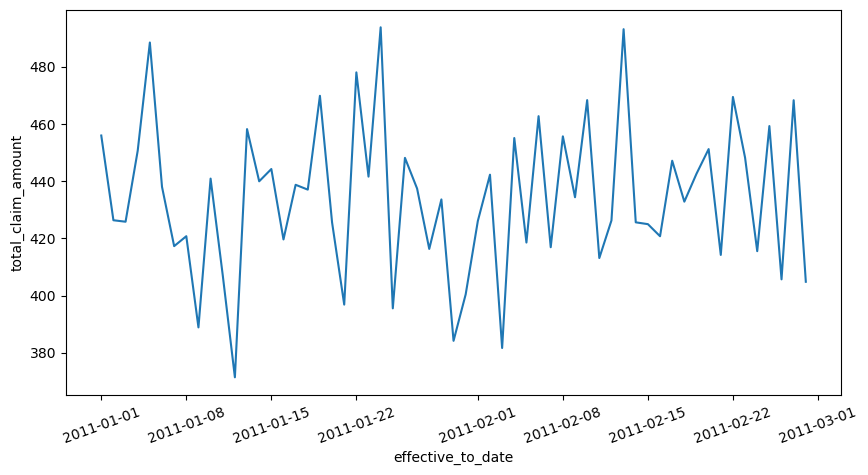

In [26]:
# I've changed the proportions of the figure for better visualization
plt.figure(figsize=(10, 5))
sns.lineplot(x= 'effective_to_date', y='total_claim_amount', data=customer_df, ci=None)
plt.xticks(rotation=20)
plt.show()

### Time analysis in new dataframe
New dataframe with different time parameters to analize temporal patterns of 'total_claim_amount'

In [27]:
time_df = pd.DataFrame()
time_df['day'] = customer_df['effective_to_date'].dt.day
time_df['day_name'] = customer_df['effective_to_date'].dt.day_name()
time_df['week'] = customer_df['effective_to_date'].dt.isocalendar().week
time_df['month'] = customer_df['effective_to_date'].dt.month_name()
time_df['total_claim_amount'] = customer_df['total_claim_amount']

In [28]:
time_df.head()

,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,19,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879


Mean by week day

In [29]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
claim_day_name = time_df.groupby(['day_name']).agg({'total_claim_amount': np.mean}).round(2).reindex(index=days)#.reset_index()
claim_day_name

,total_claim_amount
day_name,
Monday,428.56
Tuesday,432.46
Wednesday,443.54
Thursday,433.80
Friday,428.64
Saturday,435.26
Sunday,437.34


Plot the information

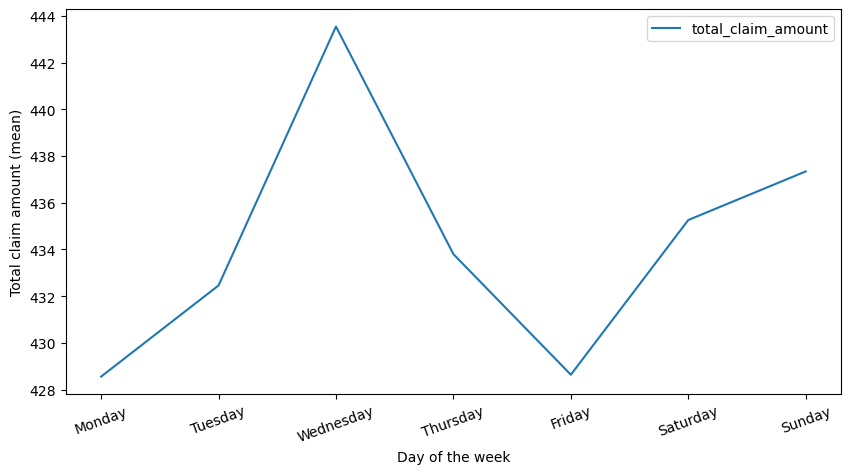

In [30]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=claim_day_name, ci=None)
plt.xlabel("Day of the week")
plt.ylabel("Total claim amount (mean)")
plt.xticks(rotation=20)
plt.show()

Number of claims per week day

In [31]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
claim_num_day_name = time_df.groupby(['day_name']).agg({'total_claim_amount': 'count'}).round(2).reindex(index=days)#.reset_index()
claim_num_day_name

,total_claim_amount
day_name,
Monday,1530
Tuesday,1162
Wednesday,1221
Thursday,1249
Friday,1245
Saturday,1397
Sunday,1330


#### Median

In [32]:
claim_median_day_name = time_df.groupby(['day_name']).agg({'total_claim_amount': 'median'}).round(2).sort_values(by='total_claim_amount',ascending=False).reset_index()
claim_median_day_name

,day_name,total_claim_amount
0,Thursday,395.33
1,Wednesday,392.24
2,Monday,385.74
3,Sunday,383.72
4,Saturday,379.20
5,Tuesday,378.49
6,Friday,371.80


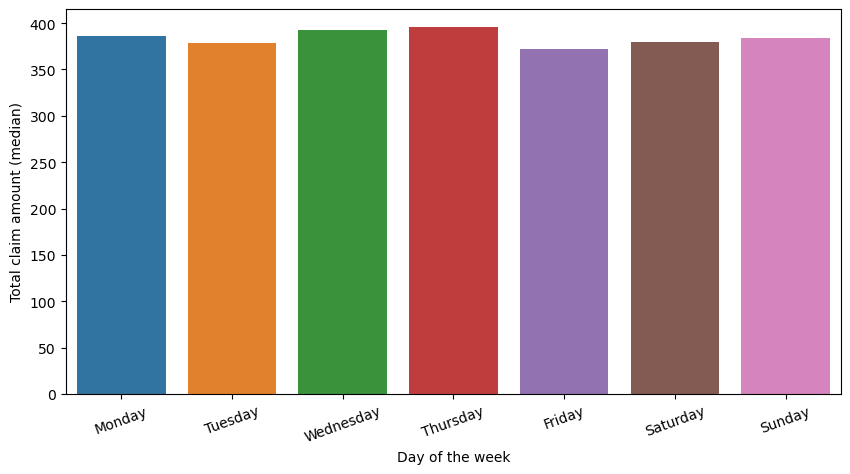

In [33]:
# plot ordered by day of the week. To plot it ordered by the median, remove "order=days"
plt.figure(figsize=(10, 5))
sns.barplot(data=claim_median_day_name, x='day_name', y='total_claim_amount', order=days)
plt.xlabel("Day of the week")
plt.ylabel("Total claim amount (median)")
plt.xticks(rotation=20)
plt.show()

#### Monthly

In [34]:
import calendar
months = calendar.month_name[1:]
claim_month = time_df.groupby(['month']).agg({'total_claim_amount': np.mean}).round(2).reindex(index=months)#.reset_index()
claim_month
# not possible to do a temporal analysis by month. Only data available for January and February

,total_claim_amount
month,
January,432.25
February,436.22
March,NaN
April,NaN
May,NaN
June,NaN
July,NaN
August,NaN
September,NaN


## Outliers

In [35]:
#cont_copy = continuous_df.copy()

def remove_outliers(df, thr=3):
    '''
    Input: dataframe
    thr= number for thershold

    Function removes the outliers that a thr times from the mean
    Return: dataframe
    '''
    for col in df.columns:
        mean = np.mean(df[col])
        stdv = np.std(df[col])
        df = df[(df[col] > mean - thr*stdv) & (df[col] < mean + thr*stdv)]
    return df

continuous_cleaned_df = remove_outliers(continuous_df)

In [36]:
# check shape of dataframes before and after removing the ourliers
display(continuous_cleaned_df.shape)
display(continuous_df.shape)

(8575, 5)

(9134, 5)

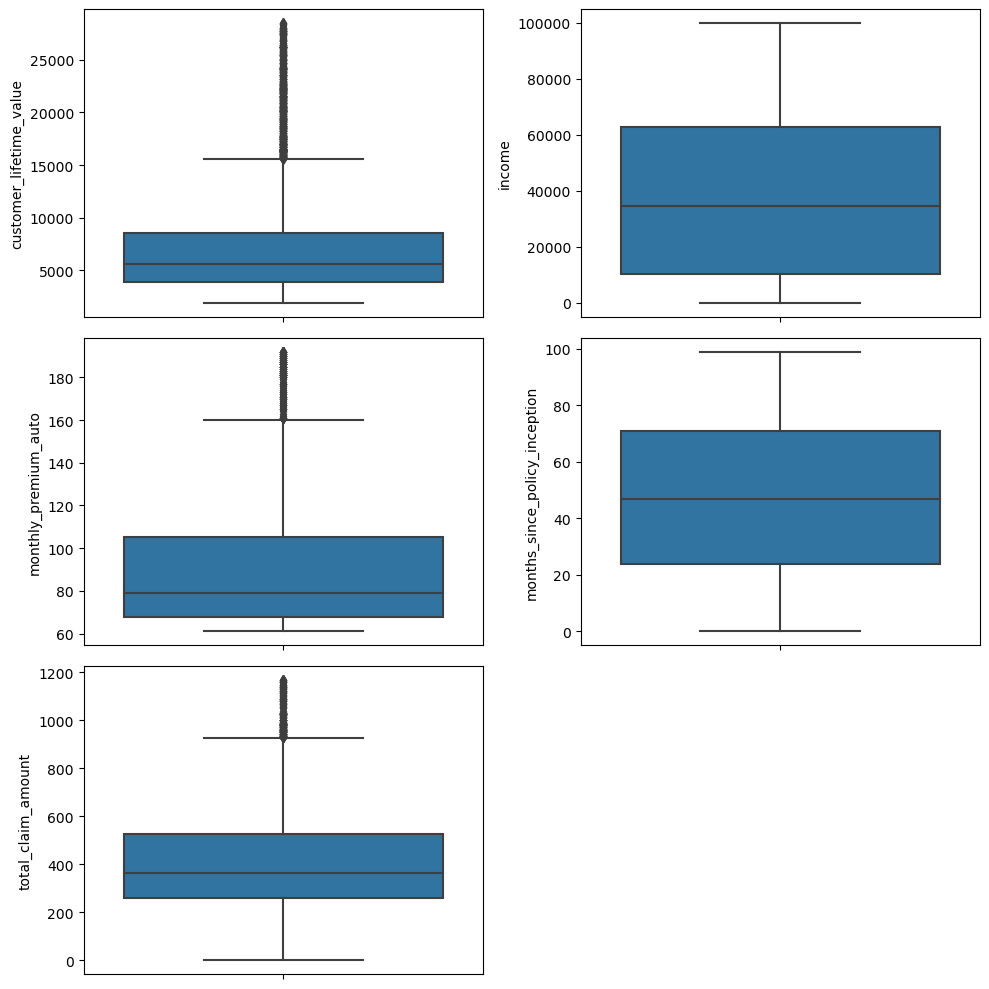

In [37]:
# plot to check how the variables look after removing the outliers
boxplot_continuous(continuous_cleaned_df)

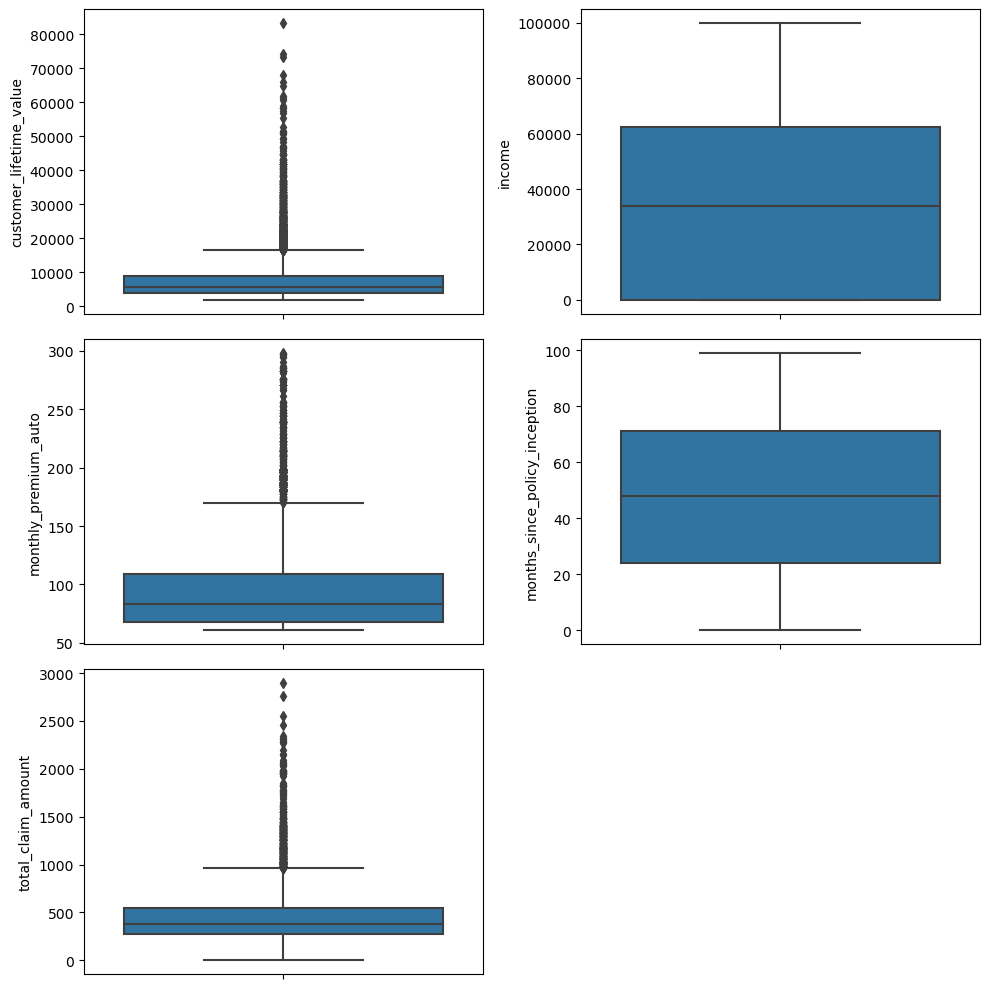

In [38]:
# without removing outliers (to compare)
boxplot_continuous(continuous_df) 

## Concatenate dataframes

In [39]:
customer_cleaned_df = pd.concat([continuous_cleaned_df, discrete_df, categorical_df, time_df[['month', 'day_name']]], axis=1)
display(customer_cleaned_df.columns)
display(customer_cleaned_df.shape)
display(customer_cleaned_df.head())

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount',
       'months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size', 'month', 'day_name'],
      dtype='object')

(9134, 23)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month,day_name
0,2763.519279,56274.0,69.0,5.0,384.811147,32,0,1,Washington,No,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,February,Thursday
1,6979.535903,0.0,94.0,42.0,1131.464935,13,0,8,Arizona,No,...,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,January,Monday
2,12887.431650,48767.0,108.0,38.0,566.472247,18,0,2,Nevada,No,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,February,Saturday
3,7645.861827,0.0,106.0,65.0,529.881344,18,0,7,California,No,...,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,January,Thursday
4,2813.692575,43836.0,73.0,44.0,138.130879,12,0,1,Washington,No,...,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,February,Thursday


In [40]:
customer_cleaned_df.isnull().sum()/len(customer_cleaned_df) # check missing values

customer_lifetime_value          0.0612
income                           0.0612
monthly_premium_auto             0.0612
months_since_policy_inception    0.0612
total_claim_amount               0.0612
months_since_last_claim          0.0000
number_of_open_complaints        0.0000
number_of_policies               0.0000
state                            0.0000
response                         0.0000
coverage                         0.0000
education                        0.0000
employmentstatus                 0.0000
gender                           0.0000
location_code                    0.0000
marital_status                   0.0000
policy                           0.0000
renew_offer_type                 0.0000
sales_channel                    0.0000
vehicle_class                    0.0000
vehicle_size                     0.0000
month                            0.0000
day_name                         0.0000
dtype: float64

In [41]:
customer_cleaned_df.dropna(inplace=True) # drop missing values created due to different number of samples between df
display(customer_cleaned_df.head())
display(customer_cleaned_df.shape)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month,day_name
0,2763.519279,56274.0,69.0,5.0,384.811147,32,0,1,Washington,No,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,February,Thursday
1,6979.535903,0.0,94.0,42.0,1131.464935,13,0,8,Arizona,No,...,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,January,Monday
2,12887.431650,48767.0,108.0,38.0,566.472247,18,0,2,Nevada,No,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,February,Saturday
3,7645.861827,0.0,106.0,65.0,529.881344,18,0,7,California,No,...,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,January,Thursday
4,2813.692575,43836.0,73.0,44.0,138.130879,12,0,1,Washington,No,...,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,February,Thursday


(8575, 23)

In [42]:
customer_cleaned_df.reset_index(drop = True)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month,day_name
0,2763.519279,56274.0,69.0,5.0,384.811147,32,0,1,Washington,No,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,February,Thursday
1,6979.535903,0.0,94.0,42.0,1131.464935,13,0,8,Arizona,No,...,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,January,Monday
2,12887.431650,48767.0,108.0,38.0,566.472247,18,0,2,Nevada,No,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,February,Saturday
3,7645.861827,0.0,106.0,65.0,529.881344,18,0,7,California,No,...,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,January,Thursday
4,2813.692575,43836.0,73.0,44.0,138.130879,12,0,1,Washington,No,...,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,February,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8570,23405.987980,71941.0,73.0,89.0,198.234764,18,0,2,California,No,...,M,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize,February,Thursday
8571,3096.511217,21604.0,79.0,28.0,379.200000,14,0,1,California,Yes,...,F,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize,February,Saturday
8572,8163.890428,0.0,85.0,37.0,790.784983,9,3,2,California,No,...,M,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize,February,Sunday
8573,7524.442436,21941.0,96.0,3.0,691.200000,34,0,3,California,No,...,M,Suburban,Married,L2,Offer3,Branch,Four-Door Car,Large,February,Thursday


### Reorder columns

In [43]:
col = customer_cleaned_df.pop('total_claim_amount')
customer_cleaned_df.insert(0, 'total_claim_amount', col)
customer_cleaned_df

,total_claim_amount,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month,day_name
0,384.811147,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,No,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,February,Thursday
1,1131.464935,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,No,...,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,January,Monday
2,566.472247,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,No,...,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,February,Saturday
3,529.881344,7645.861827,0.0,106.0,65.0,18,0,7,California,No,...,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,January,Thursday
4,138.130879,2813.692575,43836.0,73.0,44.0,12,0,1,Washington,No,...,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,February,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,198.234764,23405.987980,71941.0,73.0,89.0,18,0,2,California,No,...,M,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize,February,Thursday
9130,379.200000,3096.511217,21604.0,79.0,28.0,14,0,1,California,Yes,...,F,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize,February,Saturday
9131,790.784983,8163.890428,0.0,85.0,37.0,9,3,2,California,No,...,M,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize,February,Sunday
9132,691.200000,7524.442436,21941.0,96.0,3.0,34,0,3,California,No,...,M,Suburban,Married,L2,Offer3,Branch,Four-Door Car,Large,February,Thursday


#### Method 2: by name

In [118]:
# do not run this
#cols_order = ['total_claim_amount','customer_lifetime_value', 'income', 'monthly_premium_auto',
 #      'months_since_policy_inception', 
 #      'months_since_last_claim', 'number_of_open_complaints',
 #      'number_of_policies', 'state', 'response', 'coverage', 'education',
 #      'employmentstatus', 'gender', 'location_code', 'marital_status',
 #      'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
 #      'vehicle_size', 'month', 'day_name']
#customer_cleaned_df = customer_cleaned_df[cols_order]
#customer_cleaned_df

## Categorical variables


Response

In [44]:
customer_cleaned_df['response'] = customer_cleaned_df['response'].map({'Yes': 1, 'No': 0})
customer_cleaned_df['response'].unique()

array([0, 1], dtype=int64)

Education

In [45]:
customer_cleaned_df['education'] = list(map(lambda x: 'Graduate' if x in ['Master', 'Doctor'] else x, customer_cleaned_df['education']))
customer_cleaned_df['education'].value_counts(dropna=False)

Bachelor                2585
College                 2531
High School or Below    2441
Graduate                1018
Name: education, dtype: int64

Employment status

In [46]:
customer_cleaned_df['employmentstatus'] = list(map(lambda x: 'Inactive' if x in ['Medical Leave', 'Disabled', 'Retired'] else x, customer_cleaned_df['employmentstatus']))
customer_cleaned_df['employmentstatus'].value_counts(dropna=False)

Employed      5384
Unemployed    2127
Inactive      1064
Name: employmentstatus, dtype: int64

Gender

In [47]:
customer_cleaned_df['gender'] = customer_cleaned_df['gender'].map({'F': 1, 'M': 0})
customer_cleaned_df['gender'].value_counts(dropna=False)

1    4383
0    4192
Name: gender, dtype: int64

Vehicle class

In [48]:
customer_cleaned_df['vehicle_class'] = list(map(lambda x: 'Luxury' if x in ['Sports Car', 'Luxury SUV', 'Luxury Car'] else x, customer_cleaned_df['vehicle_class']))
customer_cleaned_df['vehicle_class'].value_counts(dropna=False)

Four-Door Car    4577
Two-Door Car     1869
SUV              1627
Luxury            502
Name: vehicle_class, dtype: int64

Coverage

In [49]:
customer_cleaned_df['coverage'] = customer_cleaned_df['coverage'].map({'Premium': 1, 'Extended': 2, 'Basic': 3})
customer_cleaned_df['coverage'].value_counts(dropna=False)

3    5353
2    2541
1     681
Name: coverage, dtype: int64

Employment status

In [50]:
customer_cleaned_df['employmentstatus'] = customer_cleaned_df['employmentstatus'].map({'Employed': 1, 'Inactive': 2, 'Unemployed': 3})
customer_cleaned_df['employmentstatus'].value_counts(dropna=False)

1    5384
3    2127
2    1064
Name: employmentstatus, dtype: int64

Location code

In [51]:
customer_cleaned_df['location_code'] = customer_cleaned_df['location_code'].map({'Urban': 1, 'Suburban': 2, 'Rural': 3})
customer_cleaned_df['location_code'].value_counts(dropna=False)

2    5342
3    1710
1    1523
Name: location_code, dtype: int64

Vehicle size

In [52]:
customer_cleaned_df['vehicle_size'] = customer_cleaned_df['vehicle_size'].map({'Large': 1, 'Medsize': 2, 'Small': 3})
customer_cleaned_df['vehicle_size'].value_counts(dropna=False)

2    6033
3    1644
1     898
Name: vehicle_size, dtype: int64

In [58]:
display(customer_cleaned_df.shape)
display(customer_cleaned_df.head())

(8575, 23)

,total_claim_amount,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month,day_name
0,384.811147,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,0,...,1,2,Married,L3,Offer1,Agent,Two-Door Car,2,February,Thursday
1,1131.464935,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,0,...,1,2,Single,L3,Offer3,Agent,Four-Door Car,2,January,Monday
2,566.472247,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,0,...,1,2,Married,L3,Offer1,Agent,Two-Door Car,2,February,Saturday
3,529.881344,7645.861827,0.0,106.0,65.0,18,0,7,California,0,...,0,2,Married,L2,Offer1,Call Center,SUV,2,January,Thursday
4,138.130879,2813.692575,43836.0,73.0,44.0,12,0,1,Washington,0,...,0,3,Single,L1,Offer1,Agent,Four-Door Car,2,February,Thursday


### Nominal

In [71]:
categorical_nominal_df = customer_cleaned_df[['state', 'education', 'marital_status', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'month', 'day_name']]
categorical_nominal_df.head()

,state,education,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,month,day_name
0,Washington,Bachelor,Married,L3,Offer1,Agent,Two-Door Car,February,Thursday
1,Arizona,Bachelor,Single,L3,Offer3,Agent,Four-Door Car,January,Monday
2,Nevada,Bachelor,Married,L3,Offer1,Agent,Two-Door Car,February,Saturday
3,California,Bachelor,Married,L2,Offer1,Call Center,SUV,January,Thursday
4,Washington,Bachelor,Single,L1,Offer1,Agent,Four-Door Car,February,Thursday


In [72]:
def list_nominal_cat(df):
    '''
    Input: dataframe
    Creates a nested list with all the possible categories for each nominal variable
    Return: list
    '''
    list = []
    for column in df.columns:
        list1 = df[column].unique().tolist()
        list.append(list1)
    return list
levels = list_nominal_cat(categorical_nominal_df)
levels

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
 ['Bachelor', 'College', 'Graduate', 'High School or Below'],
 ['Married', 'Single', 'Divorced'],
 ['L3', 'L2', 'L1'],
 ['Offer1', 'Offer3', 'Offer2', 'Offer4'],
 ['Agent', 'Call Center', 'Web', 'Branch'],
 ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'],
 ['February', 'January'],
 ['Thursday',
  'Monday',
  'Saturday',
  'Tuesday',
  'Wednesday',
  'Sunday',
  'Friday']]

In [70]:
X_train_cat.columns

Index(['state', 'education', 'marital_status', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'month', 'day_name'],
      dtype='object')

#### OneHotEncoder

In [73]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first', categories=levels)
#encoder.fit(categoricals_train)

#categoricals_train_encoded = encoder.transform(categoricals_train).toarray()
#categoricals_test_encoded  = encoder.transform(categoricals_test).toarray()

#categoricals_train_encoded = pd.DataFrame(categoricals_train_encoded, columns = encoder.get_feature_names_out())
#categoricals_test_encoded  = pd.DataFrame(categoricals_test_encoded, columns = encoder.get_feature_names_out())
#display(categoricals_train_encoded.head())
#display(categoricals_test_encoded.head())

# Start: Lab Comparing regression models


## Instructions

1. Define X and y
2. Import sklearn train_test_split and separate the data. Set test_size=0.30 and random_state=31
3. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)
4. Encode the categorical variables X_train_cat and X_test_cat using the OneHotEncoder setup in the previous lab. Remember to use `.toarray()` after `.transform()` to endup with a numpy array. Next, cast the resulting numpy arrays into pandas DataFrames. Make sure that the column names of the new dataframes are correctly setup using `encoder.get_feature_names_out()` and the same indexes of X_train_cat and X_test_cat
5. Use X_train_num to fit a power transformer. Transform BOTH X_train_num and X_test_num. Next, cast the resulting numpy arrays as pandas dataframes. Make sure to set the correct columns names and to use the same indexes of X_train_num and X_test_num. Name the final resulting dataframes as:
X_train_num_transformed_df and X_test_num_transformed_df
6. Concat X_train_num_transformed_df and X_train_cat_encoded_df into X_train_new and X_test_num_transformed_df and X_test_cat_encoded_df into X_test_new
7. Fit a MinMax scaler using X_train_new and transform X_train_new and X_test_new. Create new pandas dataframes from the resulting numpy arrays. Remember to set the correct columns names and indexes. Name the resulting dataframes as:
X_train_new_scaled_df and X_test_new_scaled_df
8. Train a simple linear regression model using X_train_new_scaled_df, and get the predictions for the train and test sets
9. Create a function that given a model prediction and real values returns a pandas dataframe with the following table:

|Error_metric| Value |
|------------|-------|
| MAE        | value |
| MSE        | value |
| RMSE       | value |
| MAPE       | value |
| R2         | value |

10. Evaluate the linear model predictions using the previous function on the TRAIN and TEST sets
11. Now define a function that takes as an input: list of models, X_train and y_train to train several model (with default values) so we can train a lot of them without repeating code. The function must return the list of trained models.
12. Use the function to train the following models (with default settings):

*[LinearRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

*[KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn-neighbors-kneighborsregressor)

*[MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor)

15. Evaluate the models with the function created earlier in the TRAIN and TEST sets. Which model performs best with the default options? 

In [74]:
# Build X and y
y = customer_cleaned_df['total_claim_amount'] # Dependent
X = customer_cleaned_df.drop(['total_claim_amount'], axis=1)

In [75]:
# split train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
X_train_num, X_train_cat = var_types_split(X_train)
X_test_num, X_test_cat = var_types_split(X_test)

## Encode categorical: OneHotEncoder

Encode the categorical variables X_train_cat and X_test_cat using the OneHotEncoder setup in the previous lab. Remember to use `.toarray()` after `.transform()` to endup with a numpy array. Next, cast the resulting numpy arrays into pandas DataFrames. Make sure that the column names of the new dataframes are correctly setup using `encoder.get_feature_names_out()` and the same indexes of X_train_cat and X_test_cat

In [80]:
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded  = encoder.transform(X_test_cat).toarray()

X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded, columns = encoder.get_feature_names_out(), index=X_train_cat.index)
X_test_cat_encoded_df  = pd.DataFrame(X_test_cat_encoded, columns = encoder.get_feature_names_out(), index=X_test_cat.index)
display(X_train_cat_encoded_df.head())
display(X_test_cat_encoded_df.head())

,state_Arizona,state_Nevada,state_California,state_Oregon,education_College,education_Graduate,education_High School or Below,marital_status_Single,marital_status_Divorced,policy_L2,...,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,month_January,day_name_Monday,day_name_Saturday,day_name_Tuesday,day_name_Wednesday,day_name_Sunday,day_name_Friday
3639,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3157,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7469,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3057,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
611,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


,state_Arizona,state_Nevada,state_California,state_Oregon,education_College,education_Graduate,education_High School or Below,marital_status_Single,marital_status_Divorced,policy_L2,...,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,month_January,day_name_Monday,day_name_Saturday,day_name_Tuesday,day_name_Wednesday,day_name_Sunday,day_name_Friday
1844,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
220,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8230,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8348,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3174,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## Transform numerical: PowerTransformer

Use X_train_num to fit a power transformer. Transform BOTH X_train_num and X_test_num. Next, cast the resulting numpy arrays as pandas dataframes. Make sure to set the correct columns names and to use the same indexes of X_train_num and X_test_num. Name the final resulting dataframes as:
X_train_num_transformed_df and X_test_num_transformed_df

In [83]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer() # Normalizes data: stabilize variance, minimize skewness
transformer.fit(X_train_num) # we will reuse this transformer for X_test later

X_train_transformed = transformer.transform(X_train_num) # np array
X_test_transformed  = transformer.transform(X_test_num) # np array
X_train_num_transformed_df = pd.DataFrame(X_train_transformed, columns=X_train_num.columns, index=X_train_num.index)
X_test_num_transformed_df  = pd.DataFrame(X_test_transformed,  columns=X_test_num.columns, index=X_test_num.index)
display(X_train_num_transformed_df.head())
display(X_train_num_transformed_df.describe().T)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,response,coverage,employmentstatus,gender,location_code,vehicle_size
3639,-0.368428,-1.658754,-1.326401,-1.430143,-0.233180,1.872805,0.488661,-0.410349,0.759032,1.434611,0.977592,1.586098,-0.154967
3157,0.131369,0.983902,-0.293007,-1.278358,-0.960213,-0.518912,1.108296,-0.410349,-1.164773,-0.765427,-1.022922,-1.663355,-0.154967
7469,-0.256261,0.846466,1.384682,0.615167,-1.274615,1.872805,-1.147921,-0.410349,-1.164773,-0.765427,-1.022922,1.586098,1.683846
3057,0.528788,-1.658754,-0.711674,1.465319,1.261013,-0.518912,-0.085760,-0.410349,0.759032,1.434611,0.977592,-0.030036,1.683846
611,0.572754,0.771727,0.791487,-1.000865,0.826033,1.872805,0.488661,-0.410349,0.759032,-0.765427,0.977592,1.586098,1.683846


,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,6002.0,-3.405510e-15,1.000083,-2.189528,-0.688114,-0.021682,0.681445,2.263852
income,6002.0,-5.521889e-16,1.000083,-1.658754,-0.250122,0.366826,0.758295,1.114454
monthly_premium_auto,6002.0,1.859640e-13,1.000083,-1.534149,-0.871560,-0.112566,0.942835,2.141865
months_since_policy_inception,6002.0,8.276729e-17,1.000083,-2.098546,-0.788271,0.098090,0.829188,1.630818
months_since_last_claim,6002.0,-1.396935e-16,1.000083,-1.949893,-0.821314,0.065386,0.826033,1.657688
number_of_open_complaints,6002.0,1.237486e-16,1.000083,-0.518912,-0.518912,-0.518912,-0.518912,1.997993
number_of_policies,6002.0,8.175918e-18,1.000083,-1.147921,-1.147921,-0.085760,0.853664,1.656331
response,6002.0,-5.075728e-17,1.000083,-0.410349,-0.410349,-0.410349,-0.410349,2.436951
coverage,6002.0,-4.821202e-16,1.000083,-1.750751,-1.164773,0.759032,0.759032,0.759032
employmentstatus,6002.0,1.399562e-15,1.000083,-0.765427,-0.765427,-0.765427,0.985756,1.434611


## Concatenate
Concat X_train_num_transformed_df and X_train_cat_encoded_df into X_train_new and X_test_num_transformed_df and X_test_cat_encoded_df into X_test_new

In [87]:
X_train_new = pd.concat([X_train_num_transformed_df, X_train_cat_encoded_df], axis=1)
X_test_new = pd.concat([X_test_num_transformed_df, X_test_cat_encoded_df], axis=1)
#customer_cleaned_df = pd.concat([continuous_cleaned_df, discrete_df, categorical_df, time_df[['month', 'day_name']]], axis=1)

display(X_train_new)
display(X_test_new)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,response,coverage,employmentstatus,...,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,month_January,day_name_Monday,day_name_Saturday,day_name_Tuesday,day_name_Wednesday,day_name_Sunday,day_name_Friday
3639,-0.368428,-1.658754,-1.326401,-1.430143,-0.233180,1.872805,0.488661,-0.410349,0.759032,1.434611,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3157,0.131369,0.983902,-0.293007,-1.278358,-0.960213,-0.518912,1.108296,-0.410349,-1.164773,-0.765427,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7469,-0.256261,0.846466,1.384682,0.615167,-1.274615,1.872805,-1.147921,-0.410349,-1.164773,-0.765427,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3057,0.528788,-1.658754,-0.711674,1.465319,1.261013,-0.518912,-0.085760,-0.410349,0.759032,1.434611,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
611,0.572754,0.771727,0.791487,-1.000865,0.826033,1.872805,0.488661,-0.410349,0.759032,-0.765427,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6104,-0.436064,0.710856,1.077431,0.552786,-0.821314,-0.518912,-1.147921,2.436951,0.759032,-0.765427,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5520,-0.150611,-1.658754,-0.491800,1.520823,1.120854,1.872805,1.297143,-0.410349,0.759032,1.434611,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5737,0.861580,-1.658754,1.508486,0.521377,1.593803,-0.518912,1.656331,2.436951,-1.164773,1.434611,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
911,0.058640,-1.658754,0.103380,0.064235,-1.459241,-0.518912,0.853664,-0.410349,-1.164773,1.434611,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,response,coverage,employmentstatus,...,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,month_January,day_name_Monday,day_name_Saturday,day_name_Tuesday,day_name_Wednesday,day_name_Sunday,day_name_Friday
1844,0.355592,-1.658754,0.545456,-1.538204,0.670196,-0.518912,0.488661,-0.410349,-1.164773,1.434611,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
220,0.093369,1.093674,-0.423338,0.859249,-1.675043,-0.518912,0.488661,-0.410349,0.759032,-0.765427,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8230,1.586006,0.325283,1.587392,1.409464,0.065386,1.872805,-0.085760,-0.410349,-1.164773,-0.765427,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8348,1.263022,0.821216,0.998532,1.381402,0.249383,-0.518912,-0.085760,-0.410349,0.759032,-0.765427,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3174,-1.372225,0.497493,-0.790199,-0.038608,0.249383,-0.518912,-1.147921,-0.410349,0.759032,-0.765427,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5487,1.151582,1.030452,0.854218,-0.397361,1.191486,1.996677,-0.085760,-0.410349,-1.750751,-0.765427,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1169,-0.760462,-1.658754,0.942835,-0.871645,-0.030818,-0.518912,-1.147921,-0.410349,-1.750751,1.434611,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
600,0.441315,0.838844,-1.428227,-1.779499,-0.821314,-0.518912,-0.085760,-0.410349,0.759032,-0.765427,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1802,0.193165,0.613729,0.051812,0.646144,-0.130218,-0.518912,0.488661,-0.410349,-1.164773,-0.765427,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## MinMaxScaler
Fit a MinMax scaler using X_train_new and transform X_train_new and X_test_new. Create new pandas dataframes from the resulting numpy arrays. Remember to set the correct columns names and indexes. Name the resulting dataframes as:
X_train_new_scaled_df and X_test_new_scaled_df

In [90]:
from sklearn.preprocessing import MinMaxScaler

transformer2 = MinMaxScaler()
transformer2.fit(X_train_new)

X_train_new_scaled = transformer2.transform(X_train_new) # np array
X_test_new_scaled  = transformer2.transform(X_test_new) # np array

X_train_new_scaled_df = pd.DataFrame(X_train_new_scaled, columns=X_train_new.columns, index=X_train_new.index)
X_test_new_scaled_df  = pd.DataFrame(X_test_new_scaled, columns=X_test_new.columns, index=X_test_new.index)

display(X_train_new_scaled_df.head())
display(X_test_new_scaled_df.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,response,coverage,employmentstatus,...,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,month_January,day_name_Monday,day_name_Saturday,day_name_Tuesday,day_name_Wednesday,day_name_Sunday,day_name_Friday
3639,0.408926,0.000000,0.056514,0.179227,0.475863,0.950261,0.583607,0.0,1.000000,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3157,0.521154,0.952924,0.337633,0.219927,0.274333,0.000000,0.804570,0.0,0.233478,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7469,0.434112,0.903365,0.794021,0.727661,0.187183,0.950261,0.000000,0.0,0.233478,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3057,0.610394,0.000000,0.223741,0.955623,0.890044,0.000000,0.378768,0.0,1.000000,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
611,0.620267,0.876415,0.632651,0.294335,0.769470,0.950261,0.583607,0.0,1.000000,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,response,coverage,employmentstatus,...,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,month_January,day_name_Monday,day_name_Saturday,day_name_Tuesday,day_name_Wednesday,day_name_Sunday,day_name_Friday
1844,0.571503,0.000000,0.565723,0.150251,0.726273,0.000000,0.583607,0.0,0.233478,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
220,0.512621,0.992507,0.302178,0.793110,0.076187,0.000000,0.583607,0.0,1.000000,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8230,0.847791,0.715430,0.849165,0.940646,0.558623,0.950261,0.378768,0.0,0.233478,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8348,0.775265,0.894260,0.688975,0.933121,0.609626,0.000000,0.378768,0.0,1.000000,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3174,0.183524,0.777528,0.202380,0.552356,0.609626,0.000000,0.000000,0.0,1.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## Linear regression
Train a simple linear regression model using X_train_new_scaled_df, and get the predictions for the train and test sets

In [91]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_new_scaled_df,y_train)


LinearRegression()

In [92]:
y_pred_train = lm.predict(X_train_new_scaled_df)
y_pred_test = lm.predict(X_test_new_scaled_df)

In [96]:
#coef_table = pd.DataFrame(list(lm.coef_),columns=X_train_new_scaled_df.columns) # Coefficients
#coef_table

### Error metrics
- Create a function that given a model prediction and real values returns a pandas dataframe with the following table:
- Evaluate the linear model predictions using the previous function on the TRAIN and TEST sets

In [127]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def model_evaluation(y_real, y_pred):
    '''
    Computes several evaluation metrics for a linear model prediction.

    Input:
        y_real: real values of the target variable.
        y_pred: predicted values of the target variable.

    Returns: dataframe with the computed error metrics.
    '''
    mae = mean_absolute_error(y_real, y_pred)
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)

    metrics_df = pd.DataFrame({'error_metric': ['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], 'value': [mae, mse, rmse, mape, r2]})

    return metrics_df

In [128]:
# Train set evaluation 
model_evaluation(y_train, y_pred_train)

,error_metric,value
0,MAE,118.418934
1,MSE,23060.885963
2,RMSE,151.858111
3,MAPE,1.720681
4,R2,0.524577


In [101]:
# Test set evaluation
model_evaluation(y_test, y_pred_test)

,error_metric,value
0,MAE,120.783048
1,MSE,23923.510943
2,RMSE,154.672269
3,MAPE,1.356256
4,R2,0.529776


## Function to train models
Now define a function that takes as an input: list of models, X_train and y_train to train several model (with default values) so we can train a lot of them without repeating code. The function must return the list of trained models.

In [122]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

def train_models(list_models, X_train, y_train):
    '''
    Trains the models from the list based on 'X_train'  and 'y_train'
    
    Input:
        list_models:
            lm: linear regressor
            lg: logistic regressor 
            knn: K-Neighbors regressor
            mlp: Multi-layer Perceptron regressor
        X_train: dataframe with independent variables from train set

        y_train: dependent variable from train set

    Returns:      
    '''

    for i in list_models:
        if i == "lm":
            lm = LinearRegression()
            lm.fit(X_train,y_train)
            print("Linear regressor trained")
        elif i == "lg":
            lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
            lg.fit(X_train, y_train)
            print("Logictic regressor trained: random_state=0, solver='lbfgs', multi_class='miltinomial'")
        elif i == "knn":
            knn = KNeighborsRegressor()
            knn.fit(X_train, y_train)
            print("K-Neighbours regressor trained: n_neighbors=5 (default)")
        elif i == "mlp":
            mlp = MLPRegressor(random_state=1, max_iter=1000).fit(X_train, y_train)
            print("Multi-layer Perceptron regressor trained: random_state=1, max_iter=1000")
        else:
            print("No valid model in the list")
    return lm, knn, mlp # this part I'm not sure how to implement it if the list of the models can vary
    # Is it a return necessary to access the trained models?



In [109]:
models = list(['lm', 'knn', 'mlp'])
models

['lm', 'knn', 'mlp']

In [123]:
lm, knn, mlp = train_models(models, X_train_new, y_train)

Linear regressor trained
K-Neighbours regressor trained: n_neighbors=5 (default)
Multi-layer Perceptron regressor trained: random_state=1, max_iter=1000


## Models' evaluation
Evaluate the models with the function created earlier in the TRAIN and TEST sets. Which model performs best with the default options? 

### Linear regression

In [117]:
y_pred_train_lm = lm.predict(X_train_new_scaled_df)
y_pred_test_lm = lm.predict(X_test_new_scaled_df)
display(model_evaluation(y_train, y_pred_train_lm))
display(model_evaluation(y_test, y_pred_test_lm))

,error_metric,value
0,MAE,118.418934
1,MSE,23060.885963
2,RMSE,151.858111
3,MAPE,1.720681
4,R2,0.524577


,error_metric,value
0,MAE,120.783048
1,MSE,23923.510943
2,RMSE,154.672269
3,MAPE,1.356256
4,R2,0.529776


### K-Neighbours regression

In [124]:
y_pred_train_knn = knn.predict(X_train_new_scaled_df)
y_pred_test_knn = knn.predict(X_test_new_scaled_df)
display(model_evaluation(y_train, y_pred_train_knn))
display(model_evaluation(y_test, y_pred_test_knn))

,error_metric,value
0,MAE,108.243831
1,MSE,20666.833949
2,RMSE,143.759639
3,MAPE,1.618756
4,R2,0.573932


,error_metric,value
0,MAE,126.805505
1,MSE,27925.680767
2,RMSE,167.109787
3,MAPE,1.438416
4,R2,0.451112


In [121]:
y_pred_train_mlp = mlp.predict(X_train_new_scaled_df)
y_pred_test_mlp = mlp.predict(X_test_new_scaled_df)
display(model_evaluation(y_train, y_pred_train_mlp))
display(model_evaluation(y_test, y_pred_test_mlp))

,error_metric,value
0,MAE,146.630855
1,MSE,32580.903864
2,RMSE,180.501811
3,MAPE,2.330533
4,R2,0.328312


,error_metric,value
0,MAE,149.024683
1,MSE,34280.038031
2,RMSE,185.148692
3,MAPE,1.783255
4,R2,0.326215


## Conclusions
- Model that explains highest proportion of the variance (`R-squared`)of the total claim amount: linear regression
- However, looking at the variance in the residuals (`MSE`) and its standard deviation (`RMSE`), the best performing model is the KNeighbours regression but only for the train set. When looking at both, train and test set, the linear model is performing better in this aspect.
- Mean absolute percentage error (`MAPE`), which measures the accuracy of the model (error of a given model) [info here](https://datagy.io/mape-python/), is very low for all the models. Especially similar between the linear and the KN regressions.[More information](https://www.indeed.com/career-advice/career-development/what-is-mape).

The best model seems to be the linear one.
